<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Task_4_Evaluation_function_and_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 评价函数与损失函数
### 4.1任务目标
学习常见的评价函数和损失函数Dice、IoU、BCE、Focal Loss、Lovász-Softmax；
对评价/损失函数的实践；
### 4.2 TP TN FP FN
+ TP(真正例 true positive) 
+ TN(真反例 true negative) 
+ FP(假正例 false positive) 
+ FN(假反例 false negative)

在分类问题中，我们经常看到上述的表述方式，以二分类为例，我们可以将所有的样本预测结果分成TP、TN、 FP、FN四类，并且每一类含有的样本数量之和为总样本数量，即TP+FP+FN+TN=总样本数量。其混淆矩阵如下：
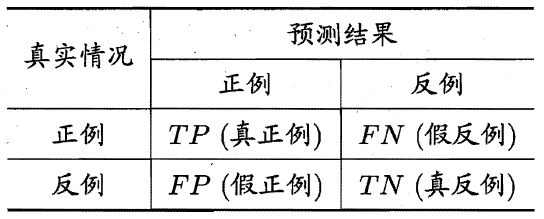

上述的概念都是通过以预测结果的视角定义的，可以依据下面方式理解：
+ 预测结果中的正例 → 在实际中是正例 → 的所有样本被称为真正例（TP）<预测正确>
+ 预测结果中的正例 → 在实际中是反例 → 的所有样本被称为假正例（FP）<预测错误>
+ 预测结果中的反例 → 在实际中是正例 → 的所有样本被称为假反例（FN）<预测错误>
+ 预测结果中的反例 → 在实际中是反例 → 的所有样本被称为真反例（TN）<预测正确>

精确率（precision）和召回率（recall）
 $$ Precision=\frac{TP}{TP+FP} \ Recall=\frac{TP}{TP+FN} $$

$Precision$代表了预测的正例中真正的正例所占比例；$Recall$代表了真正的正例中被正确预测出来的比例。

转移到语义分割任务中来，我们可以将语义分割看作是对每一个图像像素的的分类问题。根据混淆矩阵中的定义，我们亦可以将特定像素所属的集合或区域划分成TP、TN、 FP、FN四类。

![image](https://github.com/datawhalechina/team-learning-cv/blob/master/AerialImageSegmentation/img/Task4%EF%BC%9A%E8%AF%84%E4%BB%B7%E5%87%BD%E6%95%B0%E4%B8%8E%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0_image/%E5%88%86%E5%89%B2%E5%AF%B9%E7%85%A7.png)

以上面的图片为例，图中左子图中的人物区域（黄色像素集合）是我们真实标注的前景信息（target），其他区域（紫色像素集合）为背景信息。当经过预测之后，我们会得到的一张预测结果，图中右子图中的黄色像素为预测的前景（prediction），紫色像素为预测的背景区域。此时，我们便能够将预测结果分成4个部分：

+ 预测结果中的黄色无线区域 → 真实的前景 → 的所有像素集合被称为真正例（TP）<预测正确>
+ 预测结果中的蓝色斜线区域 → 真实的背景 → 的所有像素集合被称为假正例（FP）<预测错误>
+ 预测结果中的红色斜线区域 → 真实的前景 → 的所有像素集合被称为假反例（FN）<预测错误>
+ 预测结果中的白色斜线区域 → 真实的背景 → 的所有像素集合被称为真反例（TN）<预测正确>


### Dice评价指标
Dice系数（Dice coefficient）是常见的评价分割效果的方法之一，同样也可以改写成损失函数用来度量prediction和target之间的距离。Dice系数定义如下：
$$ Dice (T, P) = \frac{2 |T \cap P|}{|T| \cup |P|} = \frac{2TP}{FP+2TP+FN} $$ 式中：<br>
$T$表示真实前景（target），$P$表示预测前景（prediction）。Dice系数取值范围为$[0,1]$，其中值为1时代表预测与真实完全一致。仔细观察，Dice系数与分类评价指标中的F1 score很相似：
$$ \frac{1}{F1} = \frac{1}{Precision} + \frac{1}{Recall} \ F1 = \frac{2TP}{FP+2TP+FN} $$

所以，Dice系数不仅在直观上体现了target与prediction的相似程度，同时其本质上还隐含了精确率和召回率两个重要指标。

计算Dice时，将$|T \cap P|$近似为prediction与target对应元素相乘再相加的结果。$|T|$ 和$|P|$的计算直接进行简单的元素求和（也有一些做法是取平方求和），如下示例：

$$ |T \cap P| = \begin{bmatrix} 0.01 & 0.03 & 0.02 & 0.02 \ 0.05 & 0.12 & 0.09 & 0.07 \ 0.89 & 0.85 & 0.88 & 0.91 \ 0.99 & 0.97 & 0.95 & 0.97 \ \end{bmatrix} * \begin{bmatrix} 0 & 0 & 0 & 0 \ 0 & 0 & 0 & 0 \ 1 & 1 & 1 & 1 \ 1 & 1 & 1 & 1 \ \end{bmatrix} \stackrel{}{\rightarrow} \begin{bmatrix} 0 & 0 & 0 & 0 \ 0 & 0 & 0 & 0 \ 0.89 & 0.85 & 0.88 & 0.91 \ 0.99 & 0.97 & 0.95 & 0.97 \ \end{bmatrix} \stackrel{sum}{\rightarrow} 7.41 $$

$$ |T| = \begin{bmatrix} 0.01 & 0.03 & 0.02 & 0.02 \ 0.05 & 0.12 & 0.09 & 0.07 \ 0.89 & 0.85 & 0.88 & 0.91 \ 0.99 & 0.97 & 0.95 & 0.97 \ \end{bmatrix} \stackrel{sum}{\rightarrow} 7.82 $$

$$ |P| = \begin{bmatrix} 0 & 0 & 0 & 0 \ 0 & 0 & 0 & 0 \ 1 & 1 & 1 & 1 \ 1 & 1 & 1 & 1 \ \end{bmatrix} \stackrel{sum}{\rightarrow} 8 $$

Dice Loss

Dice Loss是在V-net模型中被提出应用的，是通过Dice系数转变而来，其实为了能够实现最小化的损失函数，以方便模型训练，以$1 - Dice$的形式作为损失函数： $$ L = 1-\frac{2 |T \cap P|}{|T| \cup |P|} $$ 在一些场合还可以添加上Laplace smoothing减少过拟合： $$ L = 1-\frac{2 |T \cap P| + 1}{|T| \cup |P|+1} $$

In [3]:
# 代码实现
import numpy as np

def dice(output, target):
    '''计算Dice系数'''
    smooth = 1e-6 # 避免0为除数
    intersection = (output * target).sum()
    return (2. * intersection + smooth) / (output.sum() + target.sum() + smooth)

# 生成随机两个矩阵测试
target = np.random.randint(0, 2, (3, 3))
output = np.random.randint(0, 2, (3, 3))
print("target  ************")
print(target)
print("output  ************")
print(output)
d = dice(output, target)

print("d:",d)

target  ************
[[1 1 0]
 [1 0 1]
 [1 0 0]]
output  ************
[[1 0 0]
 [0 1 0]
 [0 0 0]]
d: 0.28571438775508745


###  IoU评价指标
IoU（intersection over union）指标就是常说的交并比，不仅在语义分割评价中经常被使用，在目标检测中也是常用的评价指标。顾名思义，交并比就是指target与prediction两者之间交集与并集的比值：

$$ IoU=\frac{T \cap P}{T \cup P}=\frac{TP}{FP+TP+FN} $$ 仍然以人物前景分割为例，如下图，其IoU的计算就是使用$intersection / union$。

### 代码实现

In [6]:
'''计算IoU指标'''
def iou_score(output, target):
  intersection = np.logical_and(target, output) 
  union = np.logical_or(target, output) 
  return np.sum(intersection) / np.sum(union)

# 生成随机两个矩阵测试
target = np.random.randint(0, 2, (3, 3))
output = np.random.randint(0, 2, (3, 3))
print("target  ************")
print(target)
print("output  ************")
print(output)
d = iou_score(output, target)
print("iou_score:",d)

target  ************
[[1 1 1]
 [1 1 0]
 [1 0 0]]
output  ************
[[0 1 1]
 [0 0 1]
 [0 0 0]]
iou_score: 0.2857142857142857


### BCE损失函数
BCE损失函数（Binary Cross-Entropy Loss）是交叉熵损失函数（Cross-Entropy Loss）的一种特例，BCE Loss只应用在二分类任务中。针对分类问题，单样本的交叉熵损失为： $$ l(\pmb y, \pmb{\hat y})=- \sum_{i=1}^{c}y_i \cdot log\hat y_i $$ 式中，$\pmb{y}={y_1,y_2,...,y_c,}$，其中$y_i$是非0即1的数字，代表了是否属于第$i$类，为真实值；$\hat y_i$代表属于第i类的概率，为预测值。可以看出，交叉熵损失考虑了多类别情况，针对每一种类别都求了损失。针对二分类问题，上述公式可以改写为： $$ l(y,\hat y)=-[y \cdot log\hat y +(1-y)\cdot log (1-\hat y)] $$ 式中,$y$为真实值，非1即0；$\hat y$为所属此类的概率值，为预测值。这个公式也就是BCE损失函数，即二分类任务时的交叉熵损失。值得强调的是，公式中的$\hat y$为概率分布形式，因此在使用BCE损失前，都应该将预测出来的结果转变成概率值，一般为sigmoid激活之后的输出。

### 代码实现
在pytorch中，官方已经给出了BCE损失函数的API，免去了自己编写函数的痛苦：

torch.nn.BCELoss(weight: Optional[torch.Tensor] = None, size_average=None, reduce=None, reduction: str = 'mean') $$ ℓ(y,\hat y)=L={l_1,…,l_N }^⊤,\ \ \ l_n=-w_n[y_n \cdot log\hat y_n +(1-y_n)\cdot log (1-\hat y_n)] $$ 参数： weight(Tensor)- 为每一批量下的loss添加一个权重，很少使用 size_average(bool)- 弃用中 reduce(bool)- 弃用中 reduction(str) - 'none' | 'mean' | 'sum'：为代替上面的size_average和reduce而生。——为mean时返回的该批量样本loss的平均值；为sum时，返回的该批量样本loss之和

同时，pytorch还提供了已经结合了Sigmoid函数的BCE损失：torch.nn.BCEWithLogitsLoss()，相当于免去了实现进行Sigmoid激活的操作。

In [9]:
import torch
import torch.nn as nn

bce = nn.BCELoss()
bce_sig = nn.BCEWithLogitsLoss()

input = torch.randn(5, 1, requires_grad=True)
target = torch.empty(5, 1).random_(2)
pre = nn.Sigmoid()(input)

loss_bce = bce(pre, target)
loss_bce_sig = bce_sig(input, target)

print("target  ************")
print(target)
print("input  ************")
print(input)
print("pre  ************")
print(pre)

print(loss_bce)

print(loss_bce_sig)

target  ************
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])
input  ************
tensor([[-1.1285],
        [-0.0195],
        [-0.5302],
        [-2.0519],
        [ 0.0976]], requires_grad=True)
pre  ************
tensor([[0.2444],
        [0.4951],
        [0.3705],
        [0.1139],
        [0.5244]], grad_fn=<SigmoidBackward>)
tensor(0.5642, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5642, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


### Focal Loss
Focal loss最初是出现在目标检测领域，主要是为了解决正负样本比例失调的问题。那么对于分割任务来说，如果存在数据不均衡的情况，也可以借用focal loss来进行缓解。Focal loss函数公式如下所示：

$$ loss = -\frac{1}{N} \sum_{i=1}^{N}\left(\alpha y_{i}\left(1-p_{i}\right)^{\gamma} \log p_{i}+(1-\alpha)\left(1-y_{i}\right) p_{i}^{\gamma} \log \left(1-p_{i}\right)\right) $$ 仔细观察就不难发现，它其实是BCE扩展而来，对比BCE其实就多了个 $$ \alpha(1-p_{i})^{\gamma}和(1-\alpha)p_{i}^{\gamma} $$ 为什么多了这个就能缓解正负样本不均衡的问题呢？见下图：

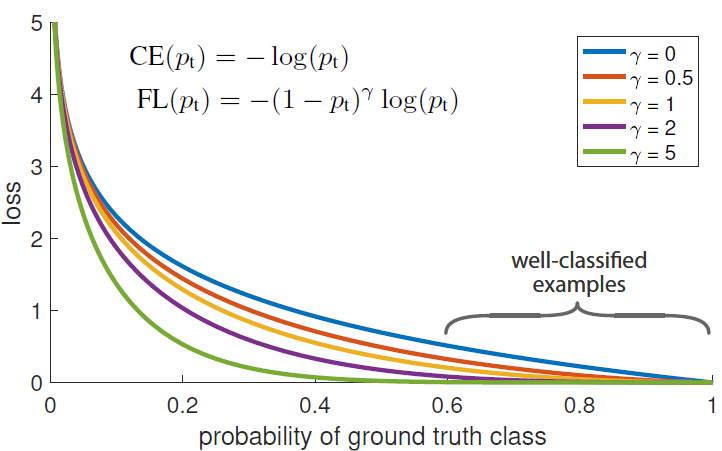

简单来说：$α$解决样本不平衡问题，$γ$解决样本难易问题。

也就是说，当数据不均衡时，可以根据比例设置合适的$α$，这个很好理解，为了能够使得正负样本得到的损失能够均衡，因此对loss前面加上一定的权重，其中负样本数量多，因此占用的权重可以设置的小一点；正样本数量少，就对正样本产生的损失的权重设的高一点。

那γ具体怎么起作用呢？以图中$γ=5$曲线为例，假设$gt$类别为1，当模型预测结果为1的概率$p_t$比较大时，我们认为模型预测的比较准确，也就是说这个样本比较简单。而对于比较简单的样本，我们希望提供的loss小一些而让模型主要学习难一些的样本，也就是$p_t→ 1$则loss接近于0，既不用再特别学习；当分类错误时，$p_t → 0$则loss正常产生，继续学习。对比图中蓝色和绿色曲线，可以看到，γ值越大，当模型预测结果比较准确的时候能提供更小的loss，符合我们为简单样本降低loss的预期。

In [10]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits	# 如果BEC带logits则损失函数在计算BECloss之前会自动计算softmax/sigmoid将其映射到[0,1]
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduce=False)
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduce=False)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

FL1 = FocalLoss(logits=False)
FL2 = FocalLoss(logits=True)

inputs = torch.randn(5, 1, requires_grad=True)
targets = torch.empty(5, 1).random_(2)
pre = nn.Sigmoid()(inputs)
f_loss_1 = FL1(pre, targets)
f_loss_2 = FL2(inputs, targets)

print('inputs:', inputs)
print('targets:', targets)
print('pre:', pre)

print('f_loss_1:', f_loss_1)

print('f_loss_2', f_loss_2)

inputs: tensor([[-0.3156],
        [ 1.3554],
        [ 0.1046],
        [ 1.5615],
        [-1.5017]], requires_grad=True)
targets: tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])
pre: tensor([[0.4218],
        [0.7950],
        [0.5261],
        [0.8266],
        [0.1822]], grad_fn=<SigmoidBackward>)
f_loss_1: tensor(0.7541, grad_fn=<MeanBackward0>)
f_loss_2 tensor(0.7541, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


### Lovász-Softmax

IoU是评价分割模型分割结果质量的重要指标，因此很自然想到能否用$1-IoU$（即Jaccard loss）来做损失函数，但是它是一个离散的loss，不能直接求导，所以无法直接用来作为损失函数。为了克服这个离散的问题，可以采用lLovász extension将离散的Jaccard loss 变得连续，从而可以直接求导，使得其作为分割网络的loss function。Lovász-Softmax相比于交叉熵函数具有更好的效果。

首先明确定义，在语义分割任务中，给定真实像素标签向量$\pmb{y^*}$和预测像素标签$\pmb{\hat{y}}$，则所属类别$c$的IoU（也称为Jaccard index）如下，其取值范围为$[0,1]$，并规定$0/0=1$：
$$
J_c(\pmb{y^*},\pmb{\hat{y}})=\frac{|\{\pmb{y^*}=c\} \cap \{\pmb{\hat{y}}=c\}|}{|\{\pmb{y^*}=c\} \cup \{\pmb{\hat{y}}=c\}|}
$$
则Jaccard loss为：
$$
\Delta_{J_c}(\pmb{y^*},\pmb{\hat{y}}) =1-J_c(\pmb{y^*},\pmb{\hat{y}})
$$
针对类别$c$，所有未被正确预测的像素集合定义为：
$$
M_c(\pmb{y^*},\pmb{\hat{y}})=\{\pmb{y^*}=c, \pmb{\hat{y}} \neq c\}\cup \{\{\pmb{y^*}\neq c, \pmb{\hat{y}} = c\}\}
$$
则可将Jaccard loss改写为关于$M_c$的子模集合函数（submodular set functions）：
$$
\Delta_{J_c}:M_c \in \{0,1\}^{p} \mapsto \frac{|M_c|}{|\{\pmb{y^*}=c\}\cup M_c|}
$$
方便理解，此处可以把$\{0,1\}^p$理解成如图像mask展开成离散一维向量的形式。

Lovász extension可以求解子模最小化问题，并且子模的Lovász extension是凸函数，可以高效实现最小化。在论文中作者对$\Delta$（集合函数）和$\overline{\Delta}$（集合函数的Lovász extension）进行了定义，为不涉及过多概念以方便理解，此处不再过多讨论。我们可以将$\overline{\Delta}$理解为一个线性插值函数，可以将$\{0,1\}^p$这种离散向量连续化，主要是为了方便后续反向传播、求梯度等等。因此我们可以通过这个线性插值函数得到$\Delta_{J_c}$的Lovász extension$\overline{\Delta_{J_c}}$。

在具有$c(c>2)$个类别的语义分割任务中，我们使用Softmax函数将模型的输出映射到概率分布形式，类似传统交叉熵损失函数所进行的操作：
$$
p_i(c)=\frac{e^{F_i(c)}}{\sum_{c^{'}\in C}e^{F_i(c^{'})}}　　\forall i \in [1,p],\forall c \in C
$$
式中，$p_i(c)$表示了像素$i$所属类别$c$的概率。通过上式可以构建每个像素产生的误差$m(c)$：
$$
m_i(c)=\left \{  
\begin{array}{c}
1-p_i(c),\ \ if \ \ c=y^{*}_{i} \\
p_i(c),\ \ \ \ \ \ \ otherwise
\end{array}
\right.
$$
可知，对于一张图像中所有像素则误差向量为$m(c)\in \{0, 1\}^p$，则可以建立关于$\Delta_{J_c}$的代理损失函数：
$$
loss(p(c))=\overline{\Delta_{J_c}}(m(c))
$$
当我们考虑整个数据集是，一般会使用mIoU进行度量，因此我们对上述损失也进行平均化处理，则定义的Lovász-Softmax损失函数为：
$$
loss(\pmb{p})=\frac{1}{|C|}\sum_{c\in C}\overline{\Delta_{J_c}}(m(c))
$$

In [11]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
try:
    from itertools import  ifilterfalse
except ImportError: # py3k
    from itertools import  filterfalse as ifilterfalse
    
# --------------------------- MULTICLASS LOSSES ---------------------------
def lovasz_softmax(probas, labels, classes='present', per_image=False, ignore=None):
    """
    Multi-class Lovasz-Softmax loss
      probas: [B, C, H, W] Variable, class probabilities at each prediction (between 0 and 1).
              Interpreted as binary (sigmoid) output with outputs of size [B, H, W].
      labels: [B, H, W] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
      per_image: compute the loss per image instead of per batch
      ignore: void class labels
    """
    if per_image:
        loss = mean(lovasz_softmax_flat(*flatten_probas(prob.unsqueeze(0), lab.unsqueeze(0), ignore), classes=classes)
                          for prob, lab in zip(probas, labels))
    else:
        loss = lovasz_softmax_flat(*flatten_probas(probas, labels, ignore), classes=classes)
    return loss


def lovasz_softmax_flat(probas, labels, classes='present'):
    """
    Multi-class Lovasz-Softmax loss
      probas: [P, C] Variable, class probabilities at each prediction (between 0 and 1)
      labels: [P] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
    """
    if probas.numel() == 0:
        # only void pixels, the gradients should be 0
        return probas * 0.
    C = probas.size(1)
    losses = []
    class_to_sum = list(range(C)) if classes in ['all', 'present'] else classes
    for c in class_to_sum:
        fg = (labels == c).float() # foreground for class c
        if (classes is 'present' and fg.sum() == 0):
            continue
        if C == 1:
            if len(classes) > 1:
                raise ValueError('Sigmoid output possible only with 1 class')
            class_pred = probas[:, 0]
        else:
            class_pred = probas[:, c]
        errors = (Variable(fg) - class_pred).abs()
        errors_sorted, perm = torch.sort(errors, 0, descending=True)
        perm = perm.data
        fg_sorted = fg[perm]
        losses.append(torch.dot(errors_sorted, Variable(lovasz_grad(fg_sorted))))
    return mean(losses)


def flatten_probas(probas, labels, ignore=None):
    """
    Flattens predictions in the batch
    """
    if probas.dim() == 3:
        # assumes output of a sigmoid layer
        B, H, W = probas.size()
        probas = probas.view(B, 1, H, W)
    B, C, H, W = probas.size()
    probas = probas.permute(0, 2, 3, 1).contiguous().view(-1, C)  # B * H * W, C = P, C
    labels = labels.view(-1)
    if ignore is None:
        return probas, labels
    valid = (labels != ignore)
    vprobas = probas[valid.nonzero().squeeze()]
    vlabels = labels[valid]
    return vprobas, vlabels


def xloss(logits, labels, ignore=None):
    """
    Cross entropy loss
    """
    return F.cross_entropy(logits, Variable(labels), ignore_index=255)

# --------------------------- HELPER FUNCTIONS ---------------------------
def isnan(x):
    return x != x
    
def mean(l, ignore_nan=False, empty=0):
    """
    nanmean compatible with generators.
    """
    l = iter(l)
    if ignore_nan:
        l = ifilterfalse(isnan, l)
    try:
        n = 1
        acc = next(l)
    except StopIteration:
        if empty == 'raise':
            raise ValueError('Empty mean')
        return empty
    for n, v in enumerate(l, 2):
        acc += v
    if n == 1:
        return acc
    return acc / n